### Arbeidskrav 7
Fortjenestemaksimering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from mpmath import findroot
from sympy.solvers import solve
from IPython.display import Markdown

from cycler import cycler
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.pylab as pylab


# custome plot style
params  = {
"lines.linewidth": 1.5,

"legend.fancybox": "true",

"axes.prop_cycle": cycler('color', ["#ffa822","#1ac0c6","#ff6150","#30B66A","#B06AFF","#FF21E1"]),
"axes.facecolor": "#2b2b2b",
"axes.axisbelow": "true",
"axes.grid": "true",
"axes.edgecolor": "#2b2b2b",
"axes.linewidth": 0.5,
"axes.labelpad": 0,

"patch.edgecolor": "#2b2b2b",
"patch.linewidth": 0.5,

"grid.linestyle": "--",
"grid.linewidth": 0.5,
"grid.color": "#b8aba7",

"xtick.major.size": 0,
"xtick.minor.size": 0,
"ytick.major.size": 0,
"ytick.minor.size": 0,

"font.family":"monospace",
"font.size":10.0,
"text.color": "#FFE9E3",
"axes.labelcolor": "#b8aba7",
"xtick.color": "#b8aba7",
"ytick.color": "#b8aba7",

"savefig.edgecolor": "#2b2b2b",
"savefig.facecolor": "#2b2b2b",

"figure.subplot.left": 0.08,
"figure.subplot.right": 0.95,
"figure.subplot.bottom": 0.09,
"figure.facecolor": "#2b2b2b"}

pylab.rcParams.update(params)
print("finish")

finish


**Oppgave 1**

En bedrift produserer en vare med produktfunksjon $x = N^{\frac{2}{5}}K^{\frac{1}{4}}$ (som i Eksempel 2.1). Vis i en figur hvordan tilbudskurven endres når (i) $K$ økes, (ii) $w$ økes og (iii) $r$ økes. Forklar intuisjonen bak dine funn.

3*x**2.5 + 5

7.5*x**1.5

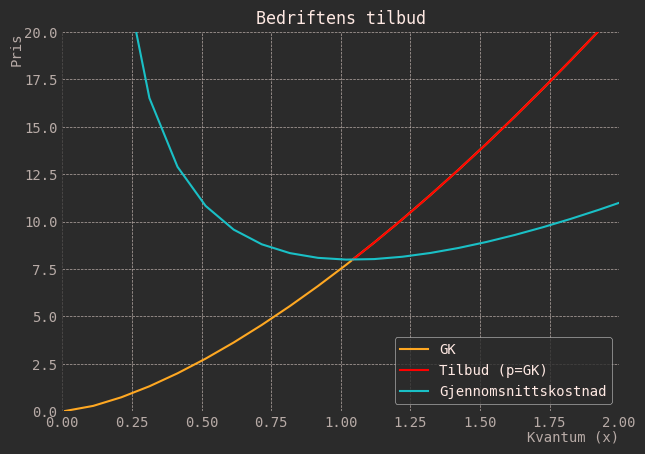

In [2]:
x,N,p = sp.symbols('x N p', positive=True, real=True)
def prod_ks(N):
    return N**.4

# løs x=f(N)
N_ks = sp.solve(prod_ks(N)-x,N)[0]
N_ks

Kostnad=5+3*N_ks
Kostnad

# tilbudet gis av likning (3) p=GK
GK = sp.diff(Kostnad, x)
GK

AOB=sp.diff(GK,x)
AOB

# vi gjør klart for å plotte
Kostnad_fn=sp.lambdify(x, Kostnad)

GK_fn=sp.lambdify(x, GK)

display(Kostnad_fn(x))
display(GK_fn(x))

def AC(x):
    return Kostnad_fn(x)/x
# finn lavest x som gir positiv fortjeneste, dvs reservasjonsprisen

lavest_x=sp.solve(AC(x)-GK_fn(x),x)[0]
lavest_x

x_num=np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')


ax.set_title('Bedriftens tilbud')
ax.legend(loc='best');

In [28]:
N, K, w, r, x = sp.symbols("N K w r x", positive =True, real =True)

# create graph function
def create_ax(x_label:str='x_label',y_label:str='y_label',lim:list=[(0,None),(0,None)],x_pos:str = 'right',y_pos:str='top'):
                fig, ax = plt.subplots(figsize=(10,5))
                ax.set_ylabel(y_label, loc=y_pos)
                ax.set_xlabel(x_label, loc=x_pos)
                ax.set(xlim=lim[0])
                ax.set(ylim=lim[1])
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

def product(N,K):
    return N**.4 * K**.25

def solveN(N,K,x):
    return sp.solve(product(N,K)-x,N)[0]

def cost(N,K,r,w):
    return K*r+N*w #Note to self, use solveN for N

def marginal_cost(N, K, r, w,x):
    cost_val = cost(N,K,r,w)
    return sp.diff(cost_val,x)

def AOB(N, x):
    return sp.diff(N, x)

def average_cost(cost,x):
    c = cost
    return c/x


In [49]:
solveN_var = solveN(N,K,x)
cost_var = cost(solveN_var,K,r,w)
marginal_cost_var = marginal_cost(solveN_var, K, r, w, x)
AOB_var = AOB(solveN_var, x)

cost_lamb = sp.lambdify((x, w, r, K), cost_var)
mc_lamb = sp.lambdify((x, w, r, K), marginal_cost_var)

low_x = sp.solve(average_cost(cost_lamb(x, w, r, K),x) - mc_lamb(x, w, r, K), x)[2]
low_x_lamb = sp.lambdify((w, r, K), low_x)

#print("test")

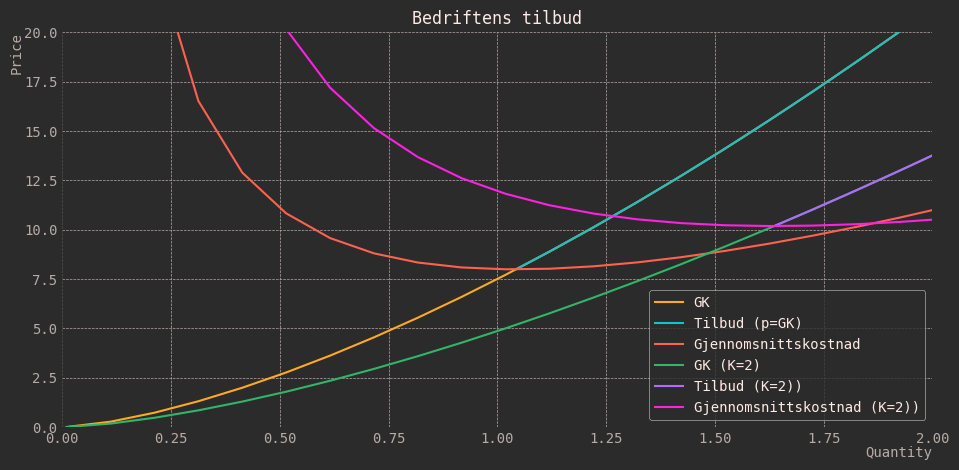

In [50]:
W_ADD = 0
R_ADD = 0
K_ADD = 1

W_VAR = 3+W_ADD
R_VAR = 5+R_ADD
K_VAR = 1+K_ADD

CHANGED_TEXT = "K"
CHANGED_VAR = K_VAR

graph_Xmin = 0
graph_Xmax = 2
graph_Ymin = 0
graph_Ymax = 20

x_num = np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
x_2 = np.linspace(float(low_x_lamb(W_VAR,R_VAR,K_VAR)),10,100)

fig, ax = create_ax(x_label='Quantity',
                    y_label='Price',
                    lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)])

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')

ax.plot(x_num, mc_lamb(x_num,W_VAR,R_VAR,K_VAR), label = f'GK ({CHANGED_TEXT}={CHANGED_VAR})')
ax.plot(x_2, mc_lamb(x_2,W_VAR,R_VAR,K_VAR), label = f'Tilbud ({CHANGED_TEXT}={CHANGED_VAR}))')
ax.plot(x_num, average_cost(cost_lamb(x_num,W_VAR,R_VAR,K_VAR),x_num), label = f'Gjennomsnittskostnad ({CHANGED_TEXT}={CHANGED_VAR}))')


ax.set_title('Bedriftens tilbud')
ax.legend(loc='best')

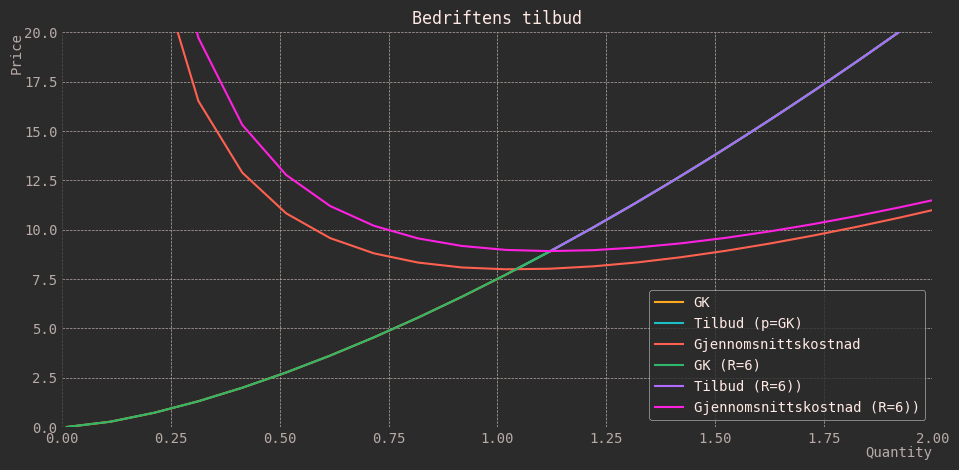

In [51]:
W_ADD = 0
R_ADD = 1
K_ADD = 0

W_VAR = 3+W_ADD
R_VAR = 5+R_ADD
K_VAR = 1+K_ADD

CHANGED_TEXT = "R"
CHANGED_VAR = R_VAR

graph_Xmin = 0
graph_Xmax = 2
graph_Ymin = 0
graph_Ymax = 20

x_num = np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
x_2 = np.linspace(float(low_x_lamb(W_VAR,R_VAR,K_VAR)),10,100)

fig, ax = create_ax(x_label='Quantity',
                    y_label='Price',
                    lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)])

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')

ax.plot(x_num, mc_lamb(x_num,W_VAR,R_VAR,K_VAR), label = f'GK ({CHANGED_TEXT}={CHANGED_VAR})')
ax.plot(x_2, mc_lamb(x_2,W_VAR,R_VAR,K_VAR), label = f'Tilbud ({CHANGED_TEXT}={CHANGED_VAR}))')
ax.plot(x_num, average_cost(cost_lamb(x_num,W_VAR,R_VAR,K_VAR),x_num), label = f'Gjennomsnittskostnad ({CHANGED_TEXT}={CHANGED_VAR}))')


ax.set_title('Bedriftens tilbud')
ax.legend(loc='best')

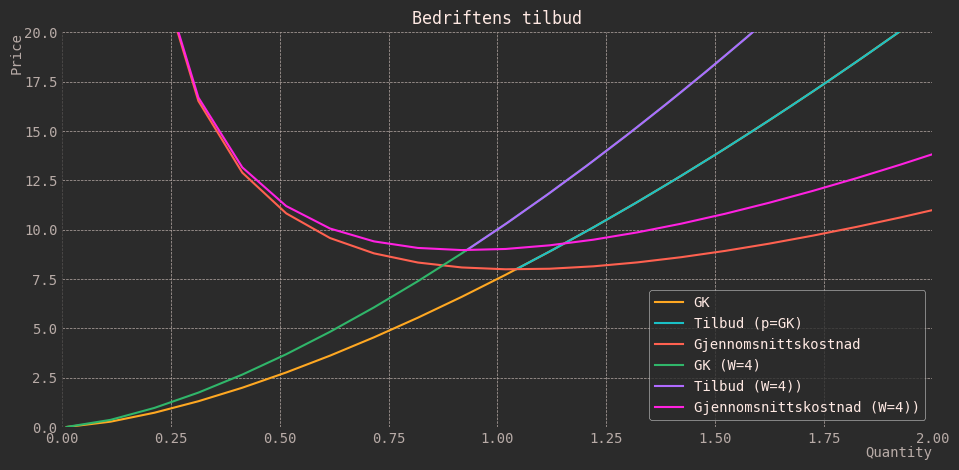

In [52]:
W_ADD = 1
R_ADD = 0
K_ADD = 0

W_VAR = 3+W_ADD
R_VAR = 5+R_ADD
K_VAR = 1+K_ADD

CHANGED_TEXT = "W"
CHANGED_VAR = W_VAR

graph_Xmin = 0
graph_Xmax = 2
graph_Ymin = 0
graph_Ymax = 20

x_num = np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
x_2 = np.linspace(float(low_x_lamb(W_VAR,R_VAR,K_VAR)),10,100)

fig, ax = create_ax(x_label='Quantity',
                    y_label='Price',
                    lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)])

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')

ax.plot(x_num, mc_lamb(x_num,W_VAR,R_VAR,K_VAR), label = f'GK ({CHANGED_TEXT}={CHANGED_VAR})')
ax.plot(x_2, mc_lamb(x_2,W_VAR,R_VAR,K_VAR), label = f'Tilbud ({CHANGED_TEXT}={CHANGED_VAR}))')
ax.plot(x_num, average_cost(cost_lamb(x_num,W_VAR,R_VAR,K_VAR),x_num), label = f'Gjennomsnittskostnad ({CHANGED_TEXT}={CHANGED_VAR}))')


ax.set_title('Bedriftens tilbud')
ax.legend(loc='best')